# Data Collection

In [92]:
from yahoo_fin import stock_info as si
import datetime as dt
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
ticker = 'TSLA'
start_date = dt.datetime(2010, 1, 1)
end_date = dt.datetime(2023, 1, 1)

In [42]:
stock_data = si.get_quote_table(ticker)
stock_data

C:\Users\Beatrice\AppData\Roaming\Python\Python39\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
C:\Users\Beatrice\AppData\Roaming\Python\Python39\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


{'1y Target Est': 241.68,
 '52 Week Range': '101.81 - 299.29',
 'Ask': '0.00 x 1300',
 'Avg. Volume': 117723322.0,
 'Beta (5Y Monthly)': 2.09,
 'Bid': '0.00 x 900',
 "Day's Range": '238.31 - 247.10',
 'EPS (TTM)': 3.35,
 'Earnings Date': 'Oct 17, 2023 - Oct 23, 2023',
 'Ex-Dividend Date': nan,
 'Forward Dividend & Yield': 'N/A (N/A)',
 'Market Cap': '783.944B',
 'Open': 243.38,
 'PE Ratio (TTM)': 73.73,
 'Previous Close': 244.88,
 'Quote Price': 246.99000549316406,
 'Volume': 103435206.0}

In [43]:
historical_data = si.get_data(ticker, start_date, end_date)
#historical_data
historical_df = pd.DataFrame(historical_data)
historical_df = historical_df.reset_index().rename(columns={'index': 'DATE'})

# Print the DataFrame with the index converted to a column and renamed
print(historical_df)

           DATE        open        high         low       close    adjclose  \
0    2010-06-29    1.266667    1.666667    1.169333    1.592667    1.592667   
1    2010-06-30    1.719333    2.028000    1.553333    1.588667    1.588667   
2    2010-07-01    1.666667    1.728000    1.351333    1.464000    1.464000   
3    2010-07-02    1.533333    1.540000    1.247333    1.280000    1.280000   
4    2010-07-06    1.333333    1.333333    1.055333    1.074000    1.074000   
...         ...         ...         ...         ...         ...         ...   
3145 2022-12-23  126.370003  128.619995  121.019997  123.150002  123.150002   
3146 2022-12-27  117.500000  119.669998  108.760002  109.099998  109.099998   
3147 2022-12-28  110.349998  116.269997  108.239998  112.709999  112.709999   
3148 2022-12-29  120.389999  123.570000  117.500000  121.820000  121.820000   
3149 2022-12-30  119.949997  124.480003  119.750000  123.180000  123.180000   

         volume ticker  
0     281494500   TSLA  
1

In [44]:
# List of symbols you're interested in
fred_symbols = ['UNRATE', 'GDP', 'FEDFUNDS', 'CPIAUCNS', 'M2', 'DGS10', 'PCE', 'T10Y2Y', 'USROA', 'USROE', 'WTISPLC', 'HOUST', 'INDPRO', 'PAYEMS', 'BAMLH0A0HYM2', 'GS10', 'BASE', 'RIFSPPFAAD01NB', 'EXUSEU', 'NETEXP']

In [45]:
fred_data = pdr.get_data_fred(fred_symbols, start_date, end_date)
fred_df = pd.DataFrame(fred_data)
fred_df

,UNRATE,GDP,FEDFUNDS,CPIAUCNS,M2,DGS10,PCE,T10Y2Y,USROA,USROE,WTISPLC,HOUST,INDPRO,PAYEMS,BAMLH0A0HYM2,GS10,BASE,RIFSPPFAAD01NB,EXUSEU,NETEXP
DATE,,,,,,,,,,,,,,,,,,,,
2010-01-01,9.8,14764.611,0.11,216.687,NaN,NaN,10056.1,NaN,0.49,4.8,78.22,614.0,89.1911,129798.0,NaN,3.73,NaN,NaN,1.4266,-509.192
2010-01-04,NaN,NaN,NaN,NaN,8451.4,3.85,NaN,2.76,NaN,NaN,NaN,NaN,NaN,NaN,6.34,NaN,NaN,0.13,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,3.77,NaN,2.76,NaN,NaN,NaN,NaN,NaN,NaN,6.30,NaN,NaN,0.12,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,3.85,NaN,2.84,NaN,NaN,NaN,NaN,NaN,NaN,6.17,NaN,NaN,0.10,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,3.85,NaN,2.82,NaN,NaN,NaN,NaN,NaN,NaN,6.03,NaN,NaN,0.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,NaN,NaN,NaN,NaN,NaN,3.88,NaN,-0.43,NaN,NaN,NaN,NaN,NaN,NaN,4.77,NaN,NaN,4.30,NaN,NaN
2022-12-29,NaN,NaN,NaN,NaN,NaN,3.83,NaN,-0.51,NaN,NaN,NaN,NaN,NaN,NaN,4.81,NaN,NaN,4.30,NaN,NaN
2022-12-30,NaN,NaN,NaN,NaN,NaN,3.88,NaN,-0.53,NaN,NaN,NaN,NaN,NaN,NaN,4.79,NaN,NaN,4.29,NaN,NaN


In [46]:
fred_df.fillna(method='ffill', inplace=True)
fred_df

,UNRATE,GDP,FEDFUNDS,CPIAUCNS,M2,DGS10,PCE,T10Y2Y,USROA,USROE,WTISPLC,HOUST,INDPRO,PAYEMS,BAMLH0A0HYM2,GS10,BASE,RIFSPPFAAD01NB,EXUSEU,NETEXP
DATE,,,,,,,,,,,,,,,,,,,,
2010-01-01,9.8,14764.611,0.11,216.687,NaN,NaN,10056.1,NaN,0.49,4.80,78.22,614.0,89.1911,129798.0,NaN,3.73,NaN,NaN,1.4266,-509.192
2010-01-04,9.8,14764.611,0.11,216.687,8451.4,3.85,10056.1,2.76,0.49,4.80,78.22,614.0,89.1911,129798.0,6.34,3.73,NaN,0.13,1.4266,-509.192
2010-01-05,9.8,14764.611,0.11,216.687,8451.4,3.77,10056.1,2.76,0.49,4.80,78.22,614.0,89.1911,129798.0,6.30,3.73,NaN,0.12,1.4266,-509.192
2010-01-06,9.8,14764.611,0.11,216.687,8451.4,3.85,10056.1,2.84,0.49,4.80,78.22,614.0,89.1911,129798.0,6.17,3.73,NaN,0.10,1.4266,-509.192
2010-01-07,9.8,14764.611,0.11,216.687,8451.4,3.85,10056.1,2.82,0.49,4.80,78.22,614.0,89.1911,129798.0,6.03,3.73,NaN,0.10,1.4266,-509.192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,3.5,26137.992,4.10,296.797,19370.8,3.88,17736.5,-0.43,0.56,5.31,76.44,1357.0,101.4848,154535.0,4.77,3.62,3382.8,4.30,1.0591,-857.068
2022-12-29,3.5,26137.992,4.10,296.797,19370.8,3.83,17736.5,-0.51,0.56,5.31,76.44,1357.0,101.4848,154535.0,4.81,3.62,3382.8,4.30,1.0591,-857.068
2022-12-30,3.5,26137.992,4.10,296.797,19370.8,3.88,17736.5,-0.53,0.56,5.31,76.44,1357.0,101.4848,154535.0,4.79,3.62,3382.8,4.29,1.0591,-857.068


In [72]:
result_df = pd.merge(historical_df, fred_df, on='DATE', how='left')
result_df = result_df.drop(columns=['ticker'])
result_df

,DATE,open,high,low,close,adjclose,volume,UNRATE,GDP,FEDFUNDS,...,WTISPLC,HOUST,INDPRO,PAYEMS,BAMLH0A0HYM2,GS10,BASE,RIFSPPFAAD01NB,EXUSEU,NETEXP
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,9.4,14980.193,0.18,...,75.35,536.0,91.8997,130501.0,7.06,3.20,2035.151,0.17,1.2223,-542.514
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,9.4,14980.193,0.18,...,75.35,536.0,91.8997,130501.0,7.13,3.20,2012.426,0.04,1.2223,-542.514
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,9.4,15141.605,0.18,...,76.37,546.0,92.2522,130420.0,7.17,3.01,2012.426,0.18,1.2811,-553.943
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,9.4,15141.605,0.18,...,76.37,546.0,92.2522,130420.0,7.13,3.01,2012.426,0.19,1.2811,-553.943
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,9.4,15141.605,0.18,...,76.37,546.0,92.2522,130420.0,7.14,3.01,2012.426,0.19,1.2811,-553.943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,3.5,26137.992,4.10,...,76.44,1357.0,101.4848,154535.0,4.59,3.62,3382.800,4.30,1.0591,-857.068
3146,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,3.5,26137.992,4.10,...,76.44,1357.0,101.4848,154535.0,4.55,3.62,3382.800,4.30,1.0591,-857.068
3147,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,3.5,26137.992,4.10,...,76.44,1357.0,101.4848,154535.0,4.77,3.62,3382.800,4.30,1.0591,-857.068
3148,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,3.5,26137.992,4.10,...,76.44,1357.0,101.4848,154535.0,4.81,3.62,3382.800,4.30,1.0591,-857.068


In [73]:
start_col = 'open'
end_col = 'NETEXP'
columns_to_scale = result_df.loc[:, start_col:end_col].columns
print(columns_to_scale)

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Scale the selected columns
result_df[columns_to_scale] = min_max_scaler.fit_transform(result_df[columns_to_scale])

# Print the scaled DataFrame
print(result_df)

Index(['open', 'high', 'low', 'close', 'adjclose', 'volume', 'UNRATE', 'GDP',
       'FEDFUNDS', 'CPIAUCNS', 'M2', 'DGS10', 'PCE', 'T10Y2Y', 'USROA',
       'USROE', 'WTISPLC', 'HOUST', 'INDPRO', 'PAYEMS', 'BAMLH0A0HYM2', 'GS10',
       'BASE', 'RIFSPPFAAD01NB', 'EXUSEU', 'NETEXP'],
      dtype='object')
           DATE      open      high       low     close  adjclose    volume  \
0    2010-06-29  0.000465  0.001350  0.000422  0.001319  0.001319  0.306605   
1    2010-06-30  0.001568  0.002224  0.001371  0.001309  0.001309  0.280640   
2    2010-07-01  0.001439  0.001498  0.000871  0.001004  0.001004  0.133184   
3    2010-07-02  0.001114  0.001043  0.000614  0.000554  0.000554  0.082560   
4    2010-07-06  0.000627  0.000543  0.000140  0.000051  0.000051  0.110956   
...         ...       ...       ...       ...       ...       ...       ...   
3145 2022-12-23  0.305302  0.308454  0.296592  0.298586  0.298586  0.181093   
3146 2022-12-27  0.283688  0.286804  0.266296  0.264227  0.264

Text(0, 0.5, 'M2')

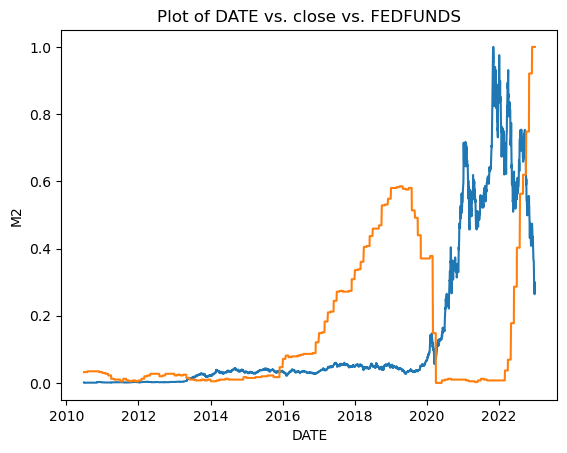

In [74]:

plt.plot(result_df['DATE'], result_df['close'], label='close')
plt.plot(result_df['DATE'], result_df['FEDFUNDS'], label='FEDFUNDS')
plt.title('Plot of DATE vs. close vs. FEDFUNDS')
plt.xlabel('DATE')
plt.ylabel('M2')

In [94]:
new_df = result_df.drop(columns=['adjclose'])
new_df = new_df.drop(columns=['DATE'])
new_df

,open,high,low,close,volume,UNRATE,GDP,FEDFUNDS,CPIAUCNS,M2,...,WTISPLC,HOUST,INDPRO,PAYEMS,BAMLH0A0HYM2,GS10,BASE,RIFSPPFAAD01NB,EXUSEU,NETEXP
0,0.000465,0.001350,0.000422,0.001319,0.306605,0.526786,0.000000,0.032099,0.000000,0.002952,...,0.598230,0.014774,0.374064,0.006695,0.515267,0.767857,0.028635,0.037296,0.514435,0.842365
1,0.001568,0.002224,0.001371,0.001309,0.280640,0.526786,0.000000,0.032099,0.000000,0.002952,...,0.598230,0.014774,0.374064,0.006695,0.524173,0.767857,0.018284,0.006993,0.514435,0.842365
2,0.001439,0.001498,0.000871,0.001004,0.133184,0.526786,0.014466,0.032099,0.000575,0.002952,...,0.608607,0.022551,0.392122,0.003348,0.529262,0.711310,0.018284,0.039627,0.642066,0.825598
3,0.001114,0.001043,0.000614,0.000554,0.082560,0.526786,0.014466,0.032099,0.000575,0.002952,...,0.608607,0.022551,0.392122,0.003348,0.524173,0.711310,0.018284,0.041958,0.642066,0.825598
4,0.000627,0.000543,0.000140,0.000051,0.110956,0.526786,0.014466,0.032099,0.000575,0.000000,...,0.608607,0.022551,0.392122,0.003348,0.525445,0.711310,0.018284,0.041958,0.642066,0.825598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0.305302,0.308454,0.296592,0.298586,0.181093,0.000000,1.000000,1.000000,0.984821,0.994990,...,0.609319,0.653188,0.865099,1.000000,0.201018,0.892857,0.642459,1.000000,0.160191,0.380881
3146,0.283688,0.286804,0.266296,0.264227,0.226751,0.000000,1.000000,1.000000,0.984821,0.994990,...,0.609319,0.653188,0.865099,1.000000,0.195929,0.892857,0.642459,1.000000,0.160191,0.380881
3147,0.266266,0.278579,0.265011,0.273055,0.240373,0.000000,1.000000,1.000000,0.984821,0.994990,...,0.609319,0.653188,0.865099,1.000000,0.223919,0.892857,0.642459,1.000000,0.160191,0.380881
3148,0.290730,0.296238,0.287894,0.295333,0.241307,0.000000,1.000000,1.000000,0.984821,0.994990,...,0.609319,0.653188,0.865099,1.000000,0.229008,0.892857,0.642459,1.000000,0.160191,0.380881


In [95]:
# Calculate correlation matrix
correlation_matrix = new_df.corr()

# Extract correlations with the target column
selected_columns = correlation_matrix.loc['open':'NETEXP', 'close']
sorted_columns = selected_columns.abs().sort_values(ascending=False)

# Print sorted correlations
print(sorted_columns)

close             1.000000
low               0.999681
high              0.999637
open              0.999204
NETEXP            0.927608
M2                0.837062
CPIAUCNS          0.834065
PCE               0.812397
GDP               0.801862
HOUST             0.721194
USROA             0.632339
USROE             0.615047
PAYEMS            0.470337
T10Y2Y            0.395149
EXUSEU            0.376713
BAMLH0A0HYM2      0.348443
UNRATE            0.281198
INDPRO            0.172510
GS10              0.172307
DGS10             0.171323
WTISPLC           0.073146
BASE              0.066391
volume            0.059321
RIFSPPFAAD01NB    0.056797
FEDFUNDS          0.052969
Name: close, dtype: float64


In [104]:
target_column = 'close'
start_col = 'high'
end_col = 'BASE'
columns_to_drop = result_df.loc[:, start_col:end_col].columns
# Extract features (independent variables) and the target variable
X = new_df.drop(columns=new_df.loc[:, 'high':'BASE'])
y = new_df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Print the model's coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error (MSE): 8.297997993622694e-05
R-squared (R2): 0.9984759598516089
Coefficients: [ 9.99052418e-01 -2.22952911e-03 -5.57862029e-04 -2.12702489e-03]
Intercept: 0.0027112700377842636


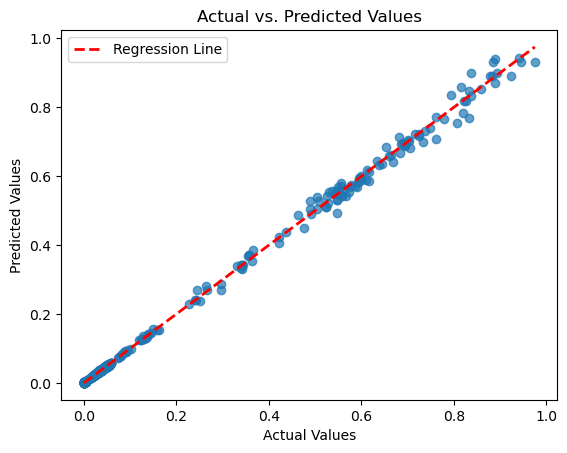

In [105]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a regression line to the plot
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Regression Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()
